In [176]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

### Data dictionary

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: if beneficiary is a smoker
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: individual medical costs billed by health insurance in USD

In [177]:
medical_costs = pd.read_csv('insurance.csv')
medical_costs.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis

### Univariate Analysis

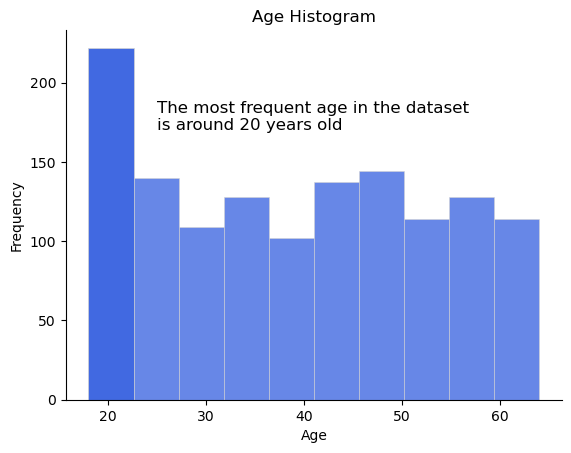

In [178]:
# Age Histogam
n, bins, patches = plt.hist(data = medical_costs, x = 'age', facecolor = 'royalblue', edgecolor = 'lightgrey', linewidth = 0.5, alpha = 0.8)

n = n.astype(int)

patches[0].set_alpha(1)

plt.annotate('The most frequent age in the dataset \nis around 20 years old', xy=(25, 170), fontsize=12)

plt.title('Age Histogram', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.show()

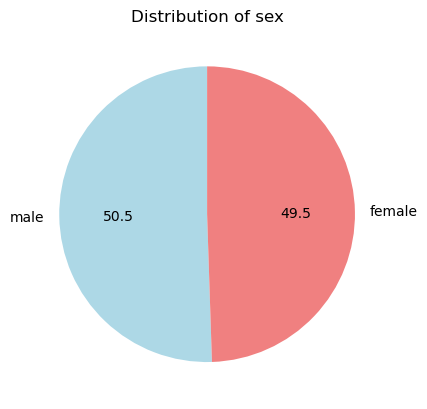

In [179]:
# Distribution of sex
sizes = medical_costs['sex'].value_counts().values
labels = medical_costs['sex'].value_counts().index
colors = ['lightblue', 'lightcoral']

plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f', startangle = 90)
plt.title('Distribution of sex');

The dataset contains almost the **same amount of men and women**.

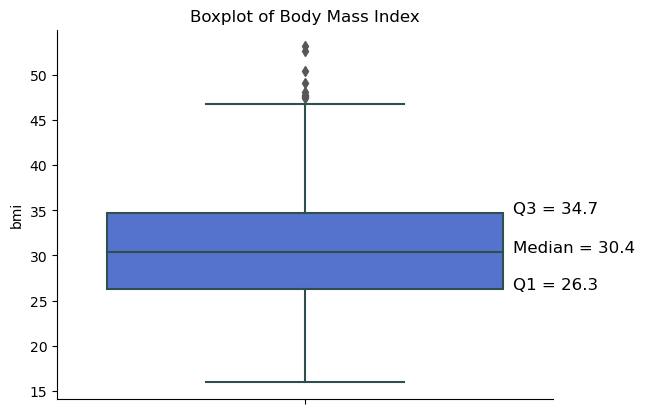

In [180]:
# BMI boxplot
sns.boxplot(data = medical_costs, y = 'bmi', color = 'royalblue', linewidth=1.5,
            boxprops=dict(edgecolor='darkslategrey'),
            whiskerprops={'color': 'darkslategrey'},
            medianprops={'color': 'darkslategrey'},
            capprops={'color': 'darkslategrey'})

plt.title('Boxplot of Body Mass Index')

annotations = ['Q1', 'Median', 'Q3']
positions = [(0.42, ypos) for ypos in medical_costs['bmi'].quantile([0.25, 0.5, 0.75])]

for text, pos in zip(annotations, positions):
    plt.annotate(f'{text} = {pos[1]:.1f}', xy=pos, fontsize=12)

Body mass index of people in the dataset is mostly between 26.3 and 34.7, with a median of 30.4. This shows that **over 75% of patients are above the ideal bmi**.

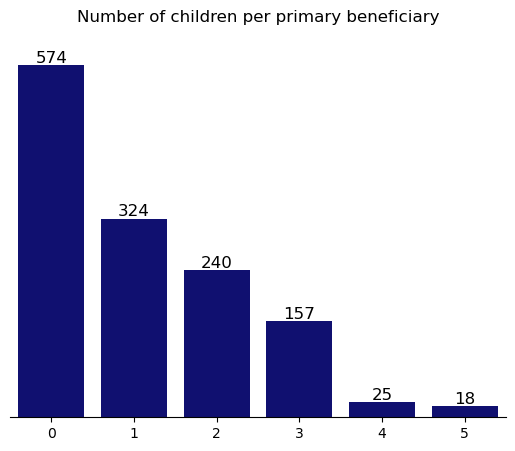

In [181]:
# Countplot of number of children
ax = sns.countplot(data = medical_costs, x = 'children', color = '#000080')

plt.xlabel(None)
plt.ylabel(None)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
plt.title('Number of children per primary beneficiary\n')

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Most people in the dataset have 2 or less children. Some have 3 children and only a small number have 4 or 5 children.

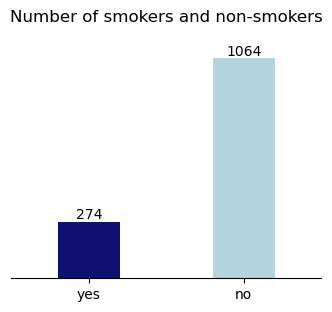

In [182]:
# Countplot of smokers
ax = sns.countplot(data = medical_costs, x = 'smoker', palette = ['#000080', 'lightblue'], width=0.4)

plt.xlabel(None)
plt.ylabel(None)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
plt.title('Number of smokers and non-smokers\n')

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.gcf().set_size_inches(4, 3)

plt.show()

About 20% of people in the dataset are smokers. 

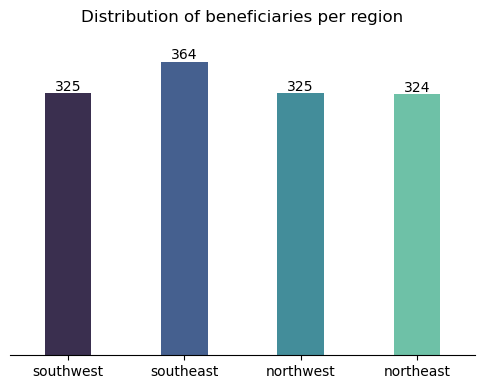

In [183]:
# Countplot of regions
ax = sns.countplot(data = medical_costs, x = 'region', palette = 'mako', width=0.4)

plt.xlabel(None)
plt.ylabel(None)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
plt.title('Distribution of beneficiaries per region\n')

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.gcf().set_size_inches(6, 4)

plt.show()

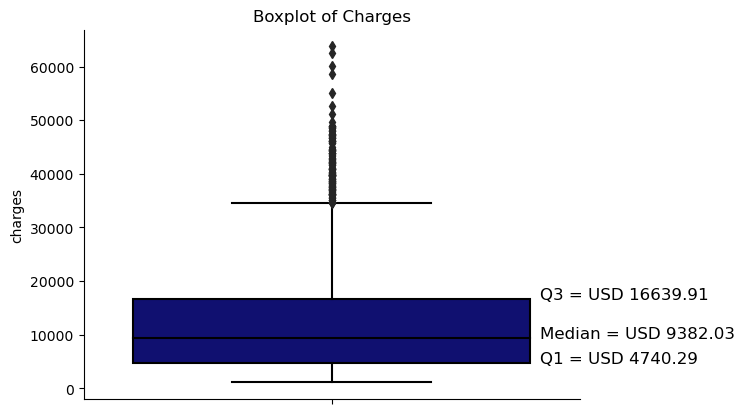

In [184]:
# Boxplot of charges
sns.boxplot(data = medical_costs, y = 'charges', color = '#000080', linewidth = 1.5,
            boxprops=dict(edgecolor='black'),
            whiskerprops={'color': 'black'},
            medianprops={'color': 'black'},
            capprops={'color': 'black'})

plt.title('Boxplot of Charges')

annotations = ['Q1', 'Median', 'Q3']
positions = [(0.42, ypos) for ypos in medical_costs['charges'].quantile([0.25, 0.5, 0.75])]

for text, pos in zip(annotations, positions):
    plt.annotate(f'{text} = USD {pos[1]:.2f}', xy=pos, fontsize=12)

### Bivariate Analysis

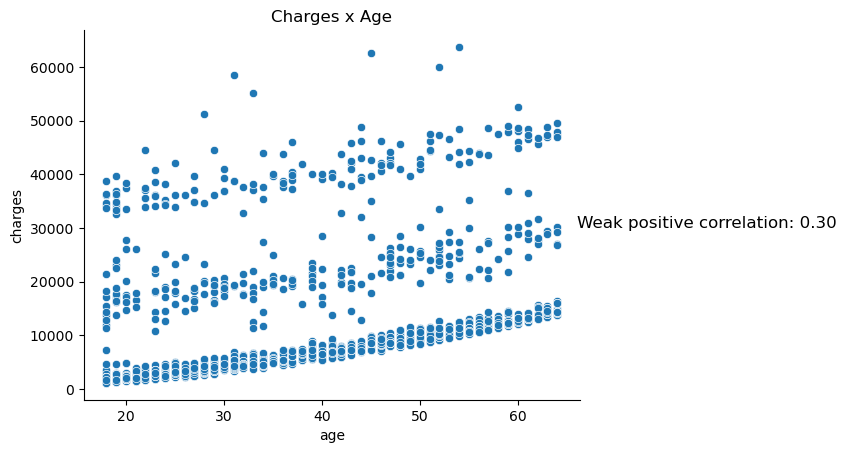

In [185]:
# Scatterplot of Charges and Age
sns.scatterplot(data = medical_costs, x = 'age', y = 'charges')
plt.title('Charges x Age')
correlation = medical_costs.age.corr(medical_costs.charges)

plt.annotate(f'Weak positive correlation: {correlation:.2f}', xy = (66, 30000), fontsize = 12);

Charges tend to increase slightly with age. But correlation is weak, so it seems like other factors are also important. It seems like there are three different ranges of charges: 0-15k USD, 15k-30k USD and 30k USD+.

Let's visualize it with changing colors.

In [186]:
bins = [0, 15000, 30000, np.inf]
labels = ['0-10k', '15k-30k', '30k+']
medical_costs['charges_range'] = pd.cut(medical_costs['charges'], bins = bins, labels = labels)
medical_costs.head()

,age,sex,bmi,children,smoker,region,charges,charges_range
0,19,female,27.900,0,yes,southwest,16884.92400,15k-30k
1,18,male,33.770,1,no,southeast,1725.55230,0-10k
2,28,male,33.000,3,no,southeast,4449.46200,0-10k
3,33,male,22.705,0,no,northwest,21984.47061,15k-30k
4,32,male,28.880,0,no,northwest,3866.85520,0-10k


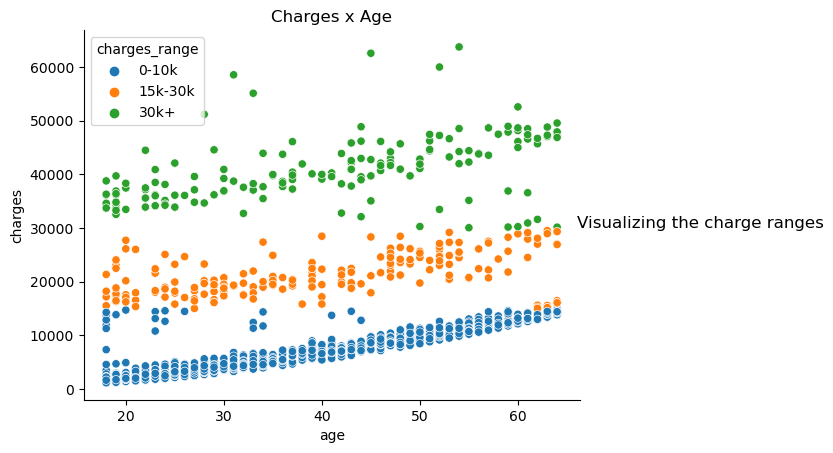

In [187]:
# Scatterplot of Charges and Age
sns.scatterplot(data = medical_costs, x = 'age', y = 'charges', hue = 'charges_range')
plt.title('Charges x Age')

plt.annotate(f'Visualizing the charge ranges', xy = (66, 30000), fontsize = 12);

The groups are not divided perfectly with age, but it is a pretty good approximation.

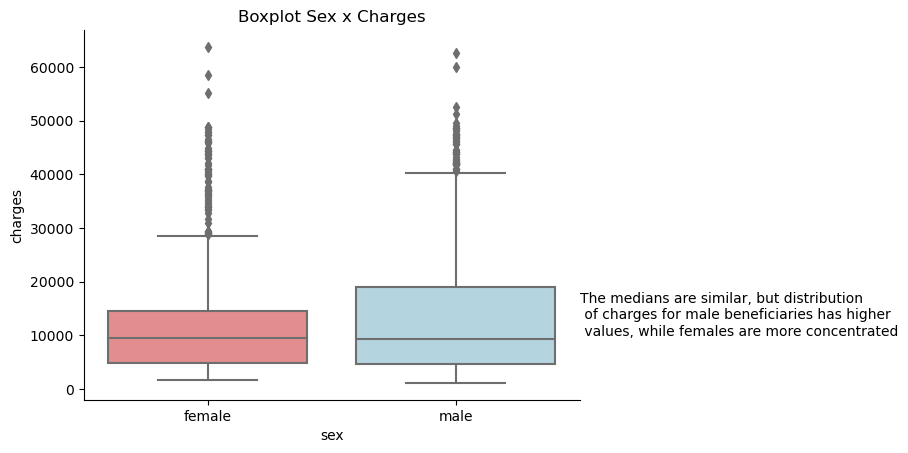

In [188]:
# Boxplot sex vs charges
sns.boxplot(data = medical_costs, x = 'sex', y = 'charges', palette = reversed(colors))
plt.title('Boxplot Sex x Charges')

plt.annotate('The medians are similar, but distribution\n of charges for male beneficiaries has higher\n values, while females are more concentrated', xy = (1.5, 10000), fontsize = 10);

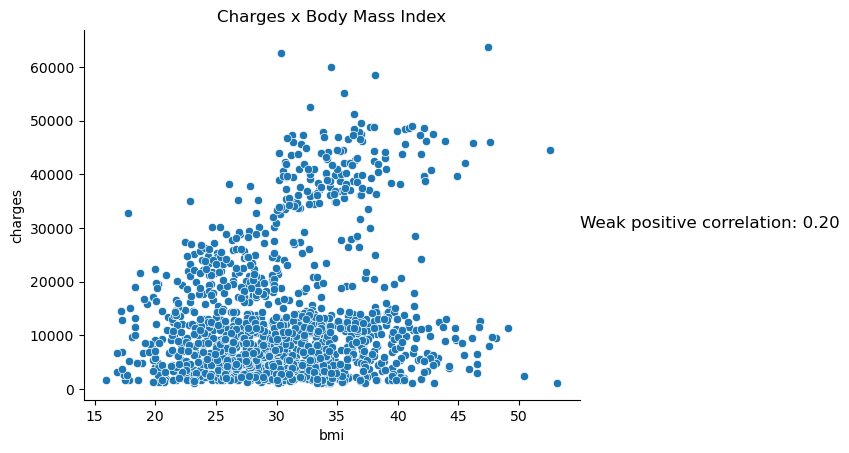

In [189]:
# Scatteplot of charges and bmi
sns.scatterplot(data = medical_costs, x = 'bmi', y = 'charges')
plt.title('Charges x Body Mass Index')
correlation = medical_costs.bmi.corr(medical_costs.charges)

plt.annotate(f'Weak positive correlation: {correlation:.2f}', xy = (55, 30000), fontsize = 12);

Correlation is really small for charges and bmi. Having a higher bmi doesn't seem to influence charges that much.

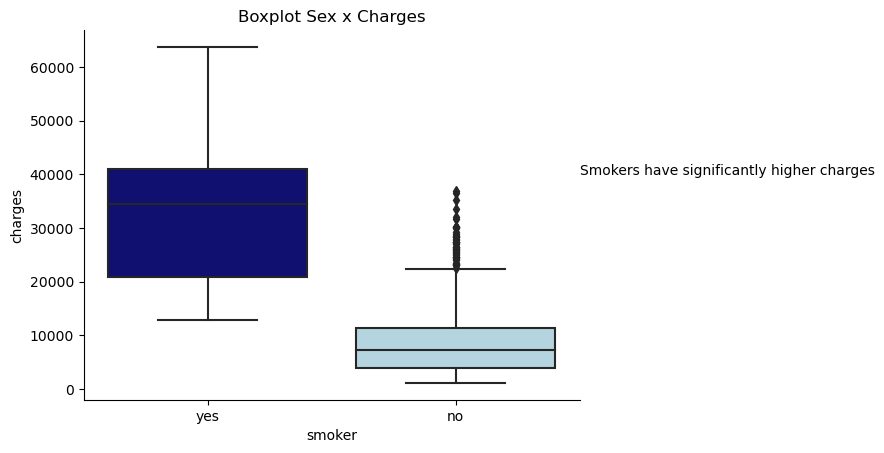

In [190]:
# Boxplot sex vs charges
sns.boxplot(data = medical_costs, x = 'smoker', y = 'charges', palette = ['#000080', 'lightblue'])
plt.title('Boxplot Sex x Charges')

plt.annotate('Smokers have significantly higher charges', xy = (1.5, 40000), fontsize = 10);

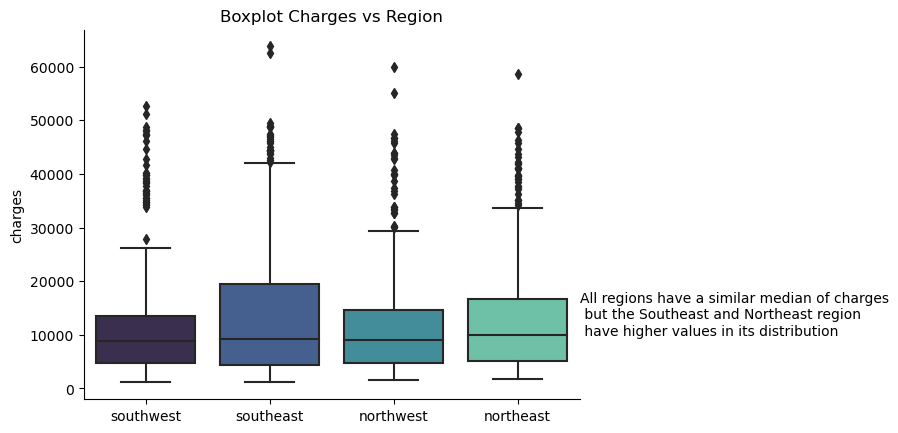

In [191]:
# Boxplot Charges x Region
sns.boxplot(data = medical_costs, x = 'region', y = 'charges', palette = 'mako')
plt.title('Boxplot Charges vs Region')
plt.xlabel(None)

plt.annotate(f'All regions have a similar median of charges\n but the Southeast and Northeast region\n have higher values in its distribution', xy = (3.5, 10000), fontsize = 10);

# Regression

### Preprocessing

In [192]:
medical_costs.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'charges_range'],
      dtype='object')

In [193]:
# Dropping created variable charges_range
medical_costs.drop(columns = 'charges_range', inplace = True)

In [194]:
# Mapping sex: 0 = male, 1 = female
medical_costs['sex'] = np.where(medical_costs['sex'] == 'male', 0, 1)

In [195]:
# Mapping smoker: 0 = no, 1 = yes
medical_costs['smoker'] = np.where(medical_costs['smoker'] == 'yes', 1, 0)

In [196]:
# Region dummies
medical_costs = pd.concat([medical_costs, pd.get_dummies(medical_costs['region'], drop_first=True)], axis = 1)
medical_costs.drop(columns = 'region', inplace = True)

In [197]:
medical_costs.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,1,0,0
4,32,0,28.880,0,0,3866.85520,1,0,0


In [198]:
# Check for missing values
medical_costs.isna().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northwest    0
southeast    0
southwest    0
dtype: int64

### Regression fitting

In [199]:
y = medical_costs['charges']
X = medical_costs.drop(columns = 'charges')

In [200]:
model = sm.OLS(y, X)
results = model.fit()

In [201]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              1158.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):                        0.00
Time:                        21:53:11   Log-Likelihood:                         -13617.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1330   BIC:                                  2.729e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          204.8859     11.681     17.540      0.000     181.970     227.802
sex         -680.1347    343.383     -1.981      0.048   -1353.766      -6.504
bmi           67.3454     18.570      3.626      0.000      30.915     103.776
children     281.9133    144.126      1.956      0.051      -0.825     564.651
smoker      2.326e+04    431.979     53.836      0.000    2.24e+04    2.41e+04
northwest  -1710.4123    487.357     -3.510      0.000   -2666.484    -754.341
southeast  -1271.9588    503.651     -2.525      0.012   -2259.995    -283.922
southwest  -1930.5262    496.107     -3.891      0.000   -2903.763    -957.289
==============================================================================
Omnibus:                      279.847   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              659.841
Skew:                           1.137   Prob(JB):                    5.22e-144
Kurtosis:                       5.581   Cond. No.                         206.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Equation found

$charges = 204.88*age - 680.13*sex + 67.34*bmi + 281*children + 2.32*10^4*smoker - 1710.41*northwest - 1271.96*southeast - 1930.53*southwest$

#### $R^2$ value

87.4% of the variance of charges is explained by the features in the dataset.

#### p-values

For every variable except children, the p-value is lower than 5%, which means that the coefficients for those variables are statistically significant. The p-value for children was just a little over 5%, which means that our hypothesis test was unable to conclude that this coefficient is higher than 0. The difference is really small, however.

#### Coefficient values - Interpretation

* age: For every 1 year of age increase, the charges increase by about USD 204.88
* sex: Charges are about USD 680.13 lower for female beneficiaries than for men.
* bmi: Every 1 unit increase in bmi tend to increase charges by about USD 67.34.
* smoker: Being a smoker increases charges by about USD 23.2k
* northwest: Compared to a person from the northeast and everything else constant, being from the northwest region reduces charges by about USD 1710.41
* southeast: Compared to a person from the northeast and everything else constant, being from the southeast region reduces charges by about USD 1271.96
* southwest: Compared to a person from the northeast and everything else constant, being from the southeast region reduces charges by about USD 1930.53

### Checking for assumptions

1. Multicolinearity
2. Homocedasticity

#### Multicolinearity

In [202]:
# Checking Variance Inflation Factor - VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
for i, vif_value in enumerate(vif):
    print(X.columns[i], ":", vif_value)

age : 7.770904619649435
sex : 1.9155432565497026
bmi : 11.067527773429752
children : 1.808088669003479
smoker : 1.254736551716395
northwest : 1.8943230983446353
southeast : 2.265881158821208
southwest : 1.9629566323163252


**Conclusion**: bmi is explained by the other variables and can be removed from the model.

In [203]:
medical_costs.drop(columns = 'bmi', inplace = True)

In [204]:
y = medical_costs['charges']
X = medical_costs.drop(columns = 'charges')

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1310.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):                        0.00
Time:                        21:53:11   Log-Likelihood:                         -13624.
No. Observations:                1338   AIC:                                  2.726e+04
Df Residuals:                    1331   BIC:                                  2.730e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          234.4743      8.398     27.921      0.000     218.000     250.948
sex         -449.1447    338.960     -1.325      0.185   -1114.099     215.810
children     371.0284    142.662      2.601      0.009      91.162     650.895
smoker      2.346e+04    430.352     54.507      0.000    2.26e+04    2.43e+04
northwest  -1158.4588    465.090     -2.491      0.013   -2070.848    -246.070
southeast   -432.6196    449.359     -0.963      0.336   -1314.148     448.909
southwest  -1290.1801    465.731     -2.770      0.006   -2203.828    -376.533
==============================================================================
Omnibus:                      270.061   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.126
Skew:                           1.093   Prob(JB):                    3.01e-141
Kurtosis:                       5.614   Cond. No.                         150.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**After removing bmi**:

$R^2$ value has not been affected much. 

Coefficient values for most variables have been affected significantly.

Sex and southeast variable are no longer statistically significant.

#### Checking for multicolinearity again

In [205]:
# Checking Variance Inflation Factor - VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
for i, vif_value in enumerate(vif):
    print(X.columns[i], ":", vif_value)

age : 3.97981899159966
sex : 1.849633643048642
children : 1.7555270876915303
smoker : 1.234039581754198
northwest : 1.7095695535140525
southeast : 1.7873822662483752
southwest : 1.7142901380111646


There is no multicolinearity.

#### Homocedasticity

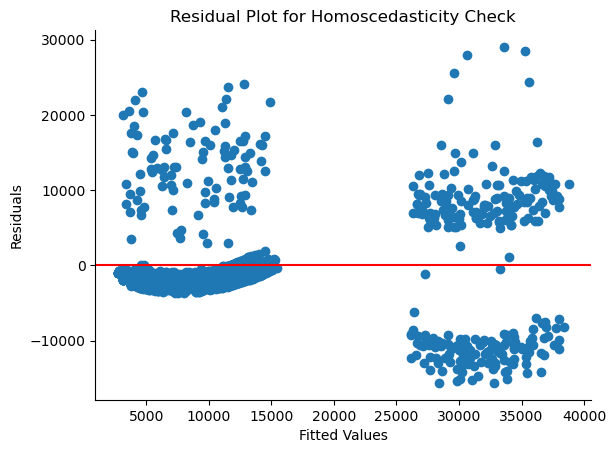

In [206]:
residuals = results.resid

# Create a residual plot
plt.scatter(results.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Homoscedasticity Check")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

From the plot, we can infer that the residues **do not have homocedasticity**. We can clearly see that residues dispersion vary across the fitted values. That means we can not conclude that the estimated coefficient are BLUE (Best Linear Unbiased Estimators).

Considering our findings, let's try and fit other regressions removing some variables.

#### Removing sex from regression

In [207]:
y = medical_costs['charges']
X = medical_costs.drop(columns = ['charges', 'sex'])

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              1527.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):                        0.00
Time:                        21:53:11   Log-Likelihood:                         -13625.
No. Observations:                1338   AIC:                                  2.726e+04
Df Residuals:                    1332   BIC:                                  2.729e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          230.7259      7.909     29.172      0.000     215.210     246.242
children     363.5896    142.592      2.550      0.011      83.860     643.319
smoker      2.347e+04    430.288     54.554      0.000    2.26e+04    2.43e+04
northwest  -1232.6406    461.839     -2.669      0.008   -2138.652    -326.629
southeast   -498.9887    446.685     -1.117      0.264   -1375.272     377.294
southwest  -1360.6749    462.814     -2.940      0.003   -2268.599    -452.751
==============================================================================
Omnibus:                      268.564   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.289
Skew:                           1.089   Prob(JB):                    9.19e-140
Kurtosis:                       5.596   Cond. No.                         147.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### After removing sex

* $R^2$ and coefficients haven't changed significantly
* All variables except southeast are statistically significant

In [208]:
# Checking Variance Inflation Factor - VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
for i, vif_value in enumerate(vif):
    print(X.columns[i], ":", vif_value)

age : 3.528211663849139
children : 1.7528086459171195
smoker : 1.2329677681799793
northwest : 1.6847991658738508
southeast : 1.7651753182651382
southwest : 1.691920850383776


There is no multicolinearity.

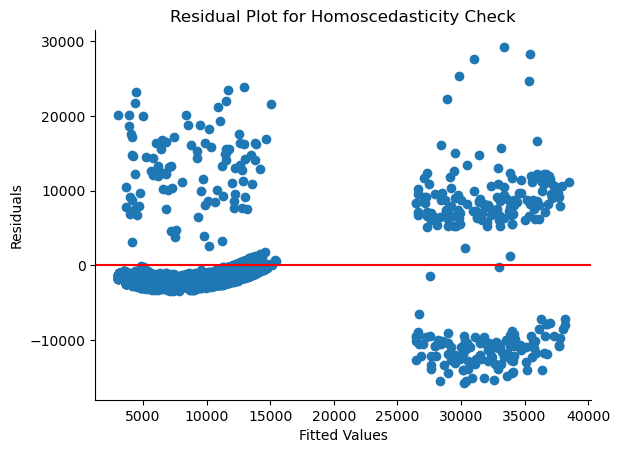

In [209]:
residuals = results.resid

# Create a residual plot
plt.scatter(results.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Homoscedasticity Check")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

The residues are still not homocedastic.

Let's drop all region variables.

In [217]:
y = medical_costs['charges']
X = medical_costs[['age', 'children', 'smoker']]

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              3030.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):                        0.00
Time:                        21:55:00   Log-Likelihood:                         -13631.
No. Observations:                1338   AIC:                                  2.727e+04
Df Residuals:                    1335   BIC:                                  2.728e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          215.3097      5.789     37.193      0.000     203.953     226.666
children     295.6197    141.424      2.090      0.037      18.183     573.056
smoker      2.343e+04    428.759     54.643      0.000    2.26e+04    2.43e+04
==============================================================================
Omnibus:                      272.953   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.577
Skew:                           1.115   Prob(JB):                    5.88e-139
Kurtosis:                       5.539   Cond. No.                         102.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$ has not reduced at all after removing the region variables. Let's try removing children too.

In [218]:
y = medical_costs['charges']
X = medical_costs[['age', 'smoker']]

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              4531.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):                        0.00
Time:                        21:55:57   Log-Likelihood:                         -13633.
No. Observations:                1338   AIC:                                  2.727e+04
Df Residuals:                    1336   BIC:                                  2.728e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          222.5144      4.657     47.781      0.000     213.379     231.650
smoker      2.348e+04    428.588     54.785      0.000    2.26e+04    2.43e+04
==============================================================================
Omnibus:                      271.407   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.573
Skew:                           1.111   Prob(JB):                    1.95e-137
Kurtosis:                       5.521   Cond. No.                         101.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$ is still at 87.2%. This model is the simplest where 87.2% of the variance of charges is explained by age and being a smoker.

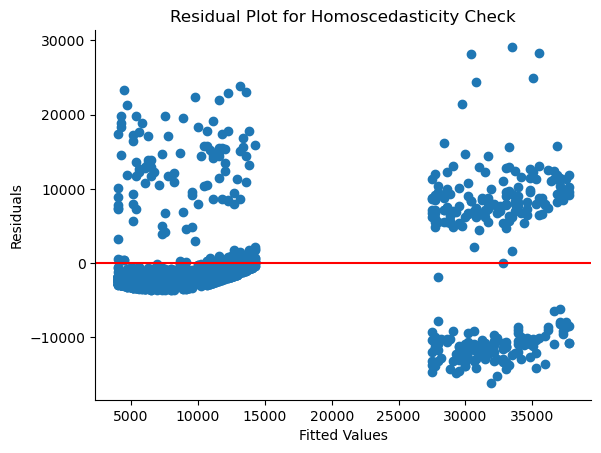

In [219]:
residuals = results.resid

# Create a residual plot
plt.scatter(results.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Homoscedasticity Check")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Residues are still not homocedastic. It was not possible to fit a regression where the coefficient estimators are BLUE. 

# Conclusion

* 87.2% of charges variance is explained by the age of beneficiary and being a smoker or not.
* Every 1 year increase in age increases charges by USD 222.51
* Being a smoker increases charges by USD 23.5k